In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('/MSFT_historical_data.csv')

In [6]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-09-04,205.4283447265625,209.36911775904642,196.74138882603222,206.24335217978393,59664100
3,2020-09-08,194.3155517578125,201.38209000793702,193.8744856529957,197.997437643837,52924300
4,2020-09-09,202.5902099609375,205.9940430172604,198.18920493769474,199.0521565659183,45679000


In [7]:
df.tail()

,Price,Close,High,Low,Open,Volume
1251,2025-08-27,506.739990234375,507.2900085449219,499.8999938964844,502.0,17277900
1252,2025-08-28,509.6400146484375,511.0899963378906,505.5,507.0899963378906,18015600
1253,2025-08-29,506.69000244140625,509.6000061035156,504.489990234375,508.6600036621094,20961600
1254,2025-09-02,505.1199951171875,506.0,496.80999755859375,500.4700012207031,18128000
1255,2025-09-03,505.3500061035156,507.7900085449219,502.32000732421875,503.7900085449219,16215400


In [8]:
df.describe()

,Price,Close,High,Low,Open,Volume
count,1256,1255,1255,1255,1255,1255
unique,1256,1247,1254,1255,1255,1252
top,2025-09-03,228.55441284179688,287.0358875725448,502.32000732421875,503.7900085449219,20570000
freq,1,2,2,1,1,2


In [9]:
import yfinance as yf
import pandas as pd

# Download the data and define the 'msft_data' variable
msft_data = yf.download("MSFT", period="5y")

# Now 'msft_data' is defined, and you can reset the index
df = msft_data.reset_index()

# Finally, select the 'Date' and 'Close' columns
df = df[['Date', 'Close']]

print(df.head())

/tmp/ipython-input-3334459968.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft_data = yf.download("MSFT", period="5y")
[*********************100%***********************]  1 of 1 completed

Price        Date       Close
Ticker                   MSFT
0      2020-09-08  194.315567
1      2020-09-09  202.590210
2      2020-09-10  196.913971
3      2020-09-11  195.629150
4      2020-09-14  196.952332


In [10]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2022-08-19')
print(datetime_object)

2022-08-19 00:00:00


In [11]:
import yfinance as yf
import pandas as pd

# 1. Download the data, which already has the dates in the correct format
msft_data = yf.download("MSFT", period="5y")

# 2. Convert the Date index into a regular column
df = msft_data.reset_index()

# 3. Select the 'Date' and 'Close' columns
df = df[['Date', 'Close']]

print(df.head())

/tmp/ipython-input-504122171.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft_data = yf.download("MSFT", period="5y")
[*********************100%***********************]  1 of 1 completed

Price        Date       Close
Ticker                   MSFT
0      2020-09-08  194.315552
1      2020-09-09  202.590210
2      2020-09-10  196.913956
3      2020-09-11  195.629135
4      2020-09-14  196.952332


In [12]:
# This code will set the 'Date' column as the index
df.index = df.pop('Date')

# Now, the 'Date' is the index
print(df.head())

Price            Close
Ticker            MSFT
Date                  
2020-09-08  194.315552
2020-09-09  202.590210
2020-09-10  196.913956
2020-09-11  195.629135
2020-09-14  196.952332


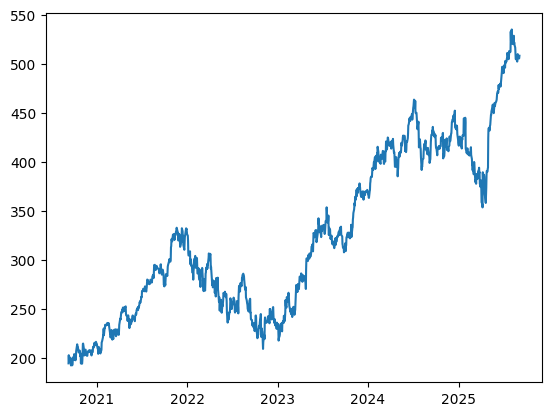

In [13]:
plt.plot(df.index, df['Close'])

In [14]:
!pip install yfinance scikit-learn

import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Download historical stock data
msft_data = yf.download("MSFT", period="5y")

# Use only the 'Close' price for the prediction
data = msft_data[['Close']]

# Scale the data to be between 0 and 1, which is good for LSTMs
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

print("Data scaled and ready.")

/tmp/ipython-input-4190194162.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft_data = yf.download("MSFT", period="5y")
[*********************100%***********************]  1 of 1 completed

Data scaled and ready.


In [15]:
# Create the training data set
training_data_len = int(np.ceil(len(scaled_data) * .80))
train_data = scaled_data[0:training_data_len, :]

# Create the training and testing sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("Training data created.")

Training data created.


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Build the LSTM model
model = keras.Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

print("Model trained.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


944/944 ━━━━━━━━━━━━━━━━━━━━ 54s 49ms/step - loss: 0.0060
Model trained.


In [17]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = data.iloc[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert to a numpy array and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Undo the scaling to get the actual dollar values
predictions = scaler.inverse_transform(predictions)

# Evaluate the model's performance
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f"Root Mean Squared Error (RMSE): {rmse}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step
Root Mean Squared Error (RMSE): 11.543214721679687


In [18]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = data.iloc[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert to a numpy array and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Undo the scaling to get the actual dollar values
predictions = scaler.inverse_transform(predictions)

# Evaluate the model's performance
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f"Root Mean Squared Error (RMSE): {rmse}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Root Mean Squared Error (RMSE): 11.543214721679687


/tmp/ipython-input-622391919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


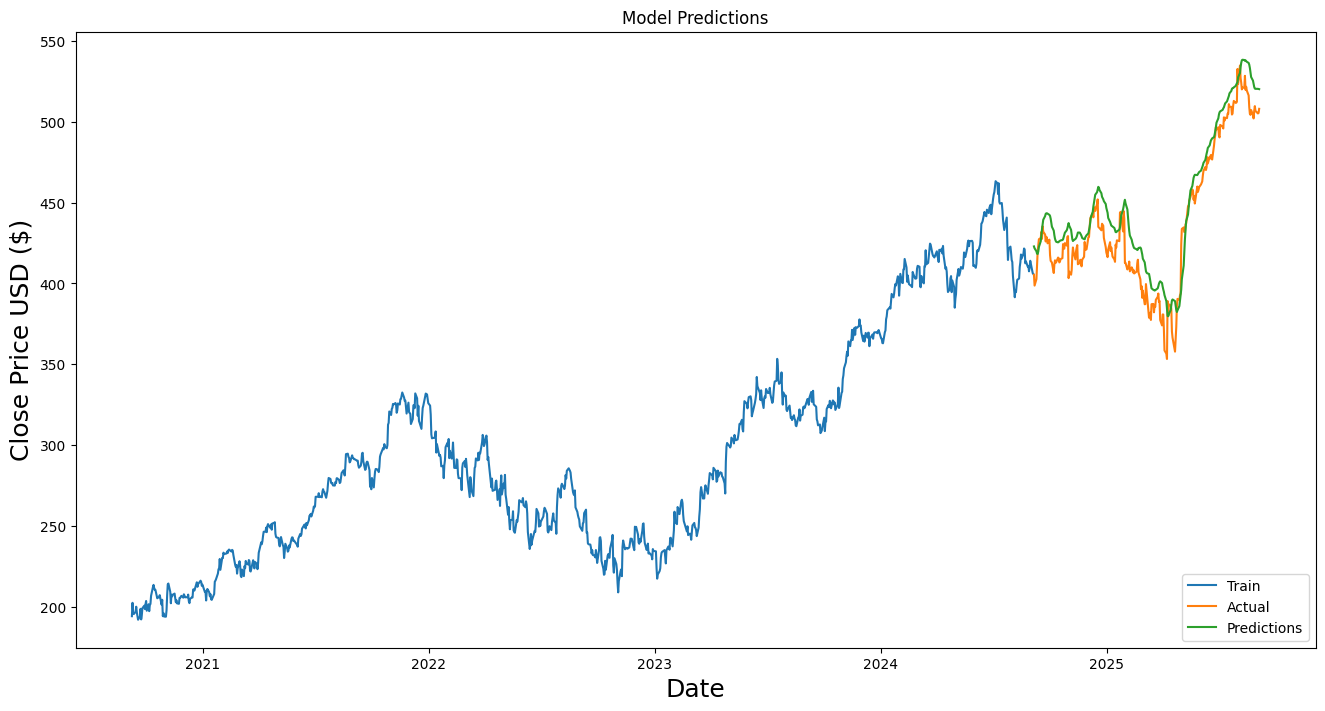

In [19]:
import matplotlib.pyplot as plt

# Create a new DataFrame with the actual and predicted prices
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the training, actual, and predicted data
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# Add a legend and show the plot
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [21]:
plt.savefig('model_predictions.png')

<Figure size 640x480 with 0 Axes>

In [30]:
    from google.colab import drive
    drive.mount('/content/gdrive')

Mounted at /content/gdrive
